>>> # Inferential Statistics (Chapter 4)

In tuesday's class you had learnt about how to infer parameters of, and draw conclusions about a population using a statistic (number/property describing a characteristic of a sample). 
Further, there were examples of wine-data which provided information about:
* Understanding sampling distributions
* Method 1: Point estimates
* Method 2: Confidence intervals
* Method 3: Hypothesis testing

In this lab session, we will look into the following
* Excercise importing function for files of .txt, .xlsx, .csv 
* Demostration of Central Limit Theorem.
* Confidence Intervals. 
* t-distributions and stats packages. 

In some point, we will make use of random numbers as data and/or wine-data. 
Please also download, the week-03 jupyter notebook file, there are explanation that might be necessary to get insightful.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm

# url  =  "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
# wine = pd.read_csv(url, sep=";")
#wine = pd.read_excel('index.xlsx', 'Sheet2') # Sometimes, the UCI repository is offline.

''' we will be using seaborn , scipy stat norm '''
import seaborn as sns
from scipy import stats
from scipy.stats import norm

# Importing the datafiles 

For importing the files as with multiple sheet in excel workbook. In Python 3.0, could use pd.read_excel().

for example, If workbook.xlsx has sheets 'Sheet1' and 'Sheet2', then use pd.read_excel('workbook.xlsx', 'Sheet1') or  ('workbook.xlsx', 'Sheet2'). 

* Now, try importing csv file present inside the zip file named-'avocado' directly (make use of 'zipfile').
* https://docs.python.org/3/library/zipfile.html

In [2]:
url  =  "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv" 
wine = pd.read_csv(url, sep=";")

import zipfile
zf = zipfile.ZipFile('avocado.zip')
avacado = pd.read_csv(zf.open('avocado.csv'))
avacado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# Get to know your system versions
import sys
print ('Python version:', sys.version, '\n')
print ('Pandas version:', np.__version__ , '\n')

('Python version:', '2.7.5 (default, May 31 2018, 09:41:32) \n[GCC 4.8.5 20150623 (Red Hat 4.8.5-28)]', '\n')
('Pandas version:', '1.15.1', '\n')


## Inferential Statistics

The below piece of code is adapted from week-03 class material. Histogram function is invoked for sampled mean (with 5 random samples taken around 1000 times and mean was computed for it and stored in an array). 

Observe the distribution of the mean samples - is it normal, uniform, gamma, beta ..... ?

mean pH, mu = 3.3111131957473416


/home/campus11/nkattapr/.local/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


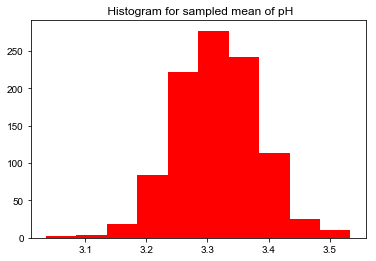

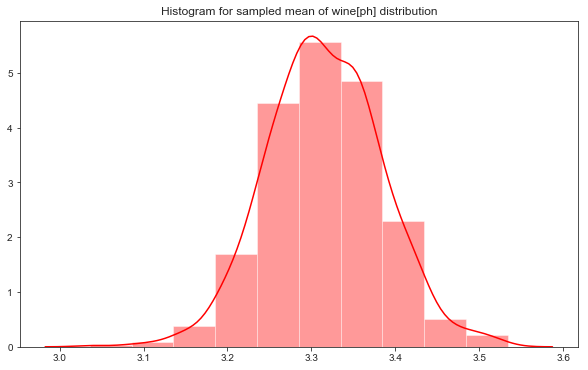

In [4]:
''' In this cell, try to sample mean as we did for wine ['ph'] data in week03. Take sampled mean and plot a histogram. Feel free to use
example code provided by Ben in class work '''


'''The piece of code from week 03 provided in above problems or in week03, it needs to compute the mean for 
N-test times the samples of random 'n' and store as an array in means[i]'''

mu = wine["pH"].mean()                                            # Mean of population
print("mean pH, mu = " + str(mu))

N_tests = 1000                                                     # No of test to perform
n = 5                                                              # random sampling
means = [0] * N_tests

for i in range(N_tests):
    observations = np.random.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    means[i] = sampled_wines["pH"].mean()
    
    
nbins = 10
_ = plt.hist(means, nbins, color= 'red' )
plt.title(' Histogram for sampled mean of pH')

# # https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.distplot(means, bins=nbins, color ='red')
plt.title('Histogram for sampled mean of wine[ph] distribution')

plt.show()

## From Chap 4, we had a chance to look into CLT (Center Limit Theorem). The initial population distribution was not observed in the class and the mean sampled distribution i.e., mean of wine['pH'], evidently displayed normal distribution (see the plots above).

## 1. Check what was the distribution of the initial population ? Observe using Histogram and discuss.

In [5]:
# Plot the distribution of the population itself i.e., wine['pH']. What kind of distribution are they

sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)


sns.distplot(wine['pH'], bins=20 )


Since, the population distribution was also normal distribution plot. We might expect that the sampled mean could be normal distribution. What if we try with different population distribution using random generator available in python library and observe the profile. Does it agree with CLT ??

For options regarding random numbers generation in certain distribution pattern, see the link:
https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

## What if the initial population is other than normal distribution. Would CLT come into picture? Under what scenarios does CLT property is very evident in the sampled mean?



## 2. Test with Uniform distribution in the initial population

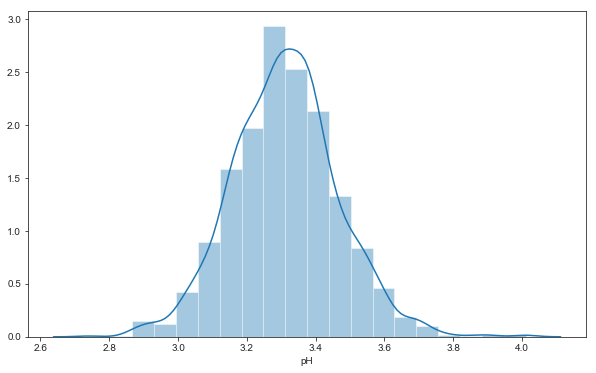

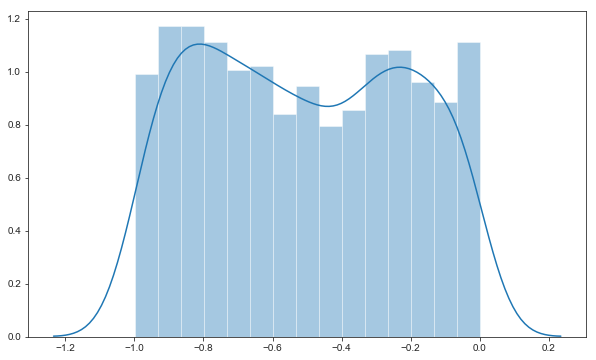

In [6]:
# try with uniform distribution function aswell.

# Create a series pandas dataform . donot forget to use pandas.series()
s = pd.Series(np.random.uniform(-1,0,1000)) 

# Use similar approach to plot a histogram for the initial population
s.head()
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)


sns.distplot(s, bins=15 )
type(s)
plt.show()
# _ = plt.hist(s, 15)

mean of random dataset, mu = -0.5105554019572164


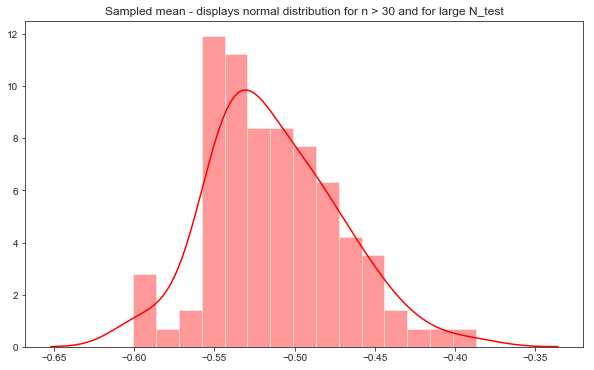

In [7]:
''' In this cell, try to sample mean as we did for wine ['ph'] data in week03. Take sampled mean 
for uniformly distributed dataset and plot a histogram. Feel free to use
example code provided by Ben in class work '''


'''The piece of code from week 03 provided in above problems or in week03, it needs to compute the mean for 
N-test times the samples of random 'n' and store as an array in means[i]'''


''' ******************* for simplicity, the code is copied here. Modify to get the sampled mean of the 
uniformally distributed sampled population *****************************'''



mu = s.mean()
print("mean of random dataset, mu = " + str(mu))

N_tests = 100
n = 50
means = [0] * N_tests
   
    
for i in range(N_tests):
    observations = np.random.choice(s.index.values,n)
    sampled_pop = s.loc[observations]
    means[i] = sampled_pop.mean()  
    
    
    
    
''' While building histogramm, use either hist() or seaborn - distplot (upto you) to plot the means[i] array'''

sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.distplot(means, 15, color = 'red')
plt.title('Sampled mean - displays normal distribution for n > 30 and for large N_test')
plt.show()

### ** Once the code is up and running. Test the following for better understanding.**
 
 * How is plot sensitive for n - no of samples drawn from population.
 * How is the profile when N_test - is increased or decreased.

# 3. Gamma and wald distribution in initial population

## Check if CLT agrees here too? 

## Please read through Chap 4 for more information


mean of random dataset, mu = 4.006978754177483


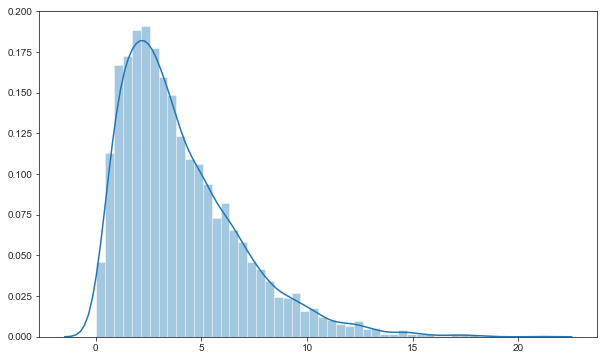

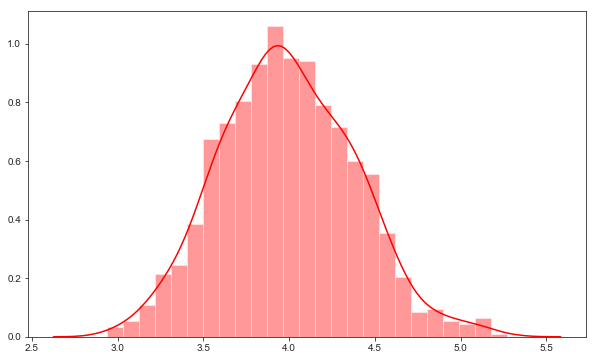

In [8]:
''' Perform the similar operation by testing on the different distribution such as gamma, wald and many more. refer to the link 
provided earlier to generate the initial samples'''

# To try Wald distribution function
# np.random.wald


# To try Gamma distribution function
# np.random.gamma

s =  pd.Series(np.random.gamma(2.0, 2.0, 5000))
# s =  pd.Series(np.random.wald(3, 2, 100000))


# s.head()
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

# Histogram plot of initial population
sns.distplot(s, bins=50 )




# In this cell, try to sample mean as we did for wine ['ph'] data (Week 03)or above. 
mu = s.mean();
print("mean of random dataset, mu = " + str(mu))

N_tests = 1000
n = 50
means = [0] * N_tests
   
    
for i in range(N_tests):
    observations = np.random.choice(s.index.values,n)
    sampled_pop = s.loc[observations]
    means[i] = sampled_pop.mean()  
    

sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.distplot(means, 25, color ='red')
plt.show()
# _ = plt.hist(s, 15)

# Measuring the Variability of Estimates

## Since, both the uniform and other distribution in population resulted in the normal (Gaussian) distribution type in the sampled mean. Now, Method-1 (point estimates) and Method 2 (Confidence Interval) can be applied.  

## Refer to section 4.3.1 and 4.3.2 in the textbook and from class week03 notebook. Explain in words (in the below Markdown cell), what really is Confidence Interval ? What does it mean 95% C.I ? 

**Answer here: **
    
    #
    
    
    
    
    .

# CI in action

## Statistical package 

## 4. Spend some time in https://docs.scipy.org/doc/scipy/reference/stats.html


* Below piece of code is replicated from week03. Have a look into the calculation of Confidence Intervals. What happens when confidence level is changed? to 90% --> 95% --> 99% --> 99.9 %.

* Check with different no of samples. 
* check what happens if the no. of N-test is increased. 

Read: 4.3.2 in textbook

('We are', 0.99, '% confident that the interval = ', [3.162322446464354, 3.629677553535646], 'contains the mean.')


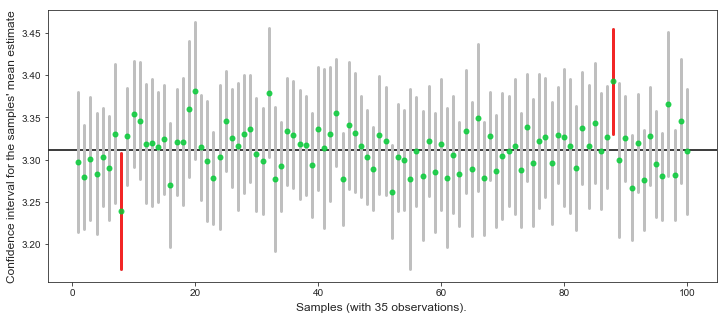

In [9]:
''' observe the output plot while changing the Confidence level, no of samples and no of times the test is performed '''

xbar = sampled_wines["pH"].mean() # some sampled mean. Note this is not a mean of initial population
sigma = sampled_wines["pH"].std() # some sampled S.D. Note this is not a mean of initial population


alpha = 0.01

z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
ci = [xbar - sigma*z_alphadiv2, xbar + sigma*z_alphadiv2 ]
print ("We are", round (confidence,5) , "% confident that the interval = ",  ci,  "contains the mean.")

N_test = 100
n = 35

means = np.array([0.0] * N_test)   # initialize list for means
sigma = np.array([0.0] * N_test)   # initialize list for standard deviation
ci = np.array([[0.0,0.0]] * N_test)  # initialize list for confidence intervals
mu = wine["pH"].mean()  # true mean


for i in range(N_test):
    observations = np.random.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    means[i] = sampled_wines["pH"].mean()
    sigma[i] = sampled_wines["pH"].std()
    ci[i] = means[i] + np.array([-sigma[i] * z_alphadiv2/np.sqrt(n), sigma[i]*z_alphadiv2/np.sqrt(n)])

out1 = ci[:,0] > mu # flag CI that do not contain the "true" mean
out2 = ci[:,1] < mu # flag CI that do not contain the "true" mean


fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ind = np.arange(1, N_test+1)
ax.axhline(y = mu, 
           xmin = 0, 
           xmax = N_test+1, 
           color = [0, 0, 0])

ci = np.transpose(ci)
ax.plot([ind,ind], 
        ci, 
        color = '0.75', 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out1],ind[out1]], 
        ci[:, out1], 
        color = [1, 0, 0, 0.8], 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out2],ind[out2]], 
        ci[:, out2], 
        color = [1, 0, 0, 0.8], 
        marker = '_',
        ms = 0, 
        linewidth = 3)
ax.plot(ind, 
        means, 
        color = [0, .8, .2, .8], 
        marker = '.',
        ms = 10, 
        linestyle = '')
ax.set_ylabel("Confidence interval for the samples' mean estimate",
              fontsize = 12)
ax.set_xlabel('Samples (with %d observations). '  %n, 
              fontsize = 12)
n = plt.show()

## 5.a. Now assume that only the good quality wine is distilled at one of the brewing center. It is known to contain pH greater than and equal to 3.5. The sampled mean by one of the quality inspector was 3.56 for a batch of 15. What is the 95% CI for mean 

In [10]:
''' Since, we are interested in only a batch which has pH greater than 3.5. This becomes our population 
of interest '''

n = 15
alpha = 0.05

# Arbitarirly selected.
Xbar = 3.56

# refining data for higher quality wines with pH >= 3.5 
highquality = wine[wine['pH']>= 3.5]
sigma = highquality['pH'].std()


observations = np.random.choice(highquality.index.values, 15)
sampled_observations = highquality.loc[observations]

mu = sampled_observations['pH'].mean()
sigma = sampled_observations['pH'].std()
print 'The mean is :', mu, '& the Std deviation is:', sigma


# standard error computation
se = sigma/np.sqrt(n)
z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
CI = [Xbar - se*z_alphadiv2,Xbar + se*z_alphadiv2 ]

print 'we are', round(100*confidence,3), "confident that the interval = ", CI , "contains the mean."

The mean is : 3.5513333333333335 & the Std deviation is: 0.04323799035019801
we are 95.0 confident that the interval =  [3.538118959914128, 3.581881040085872] contains the mean.


## 5.b. Using Stats.norm.interval(), CI can be computed. Use this function to compute the 95% CI for mean of 3.56 (batch of 15)

In [11]:
CIs = stats.norm.interval(0.95, loc=3.56, scale=se)

print ('we are', round(100*0.95, 3), '%', "confident that the interval = ", CI , "contains the mean.")

# Both cell should have exact solution for CI. If not, check for data error.

('we are', 95.0, '%', 'confident that the interval = ', [3.538118959914128, 3.581881040085872], 'contains the mean.')


## 6.a. If number of samples are less, it is better to perform t-test. 

Please perform the t-test below

In [12]:
from scipy.stats import t
alpha = 0.05
xbar = 18.3
n = 15
dof = n-1
se = 5.1/np.sqrt(n)
t_alphadiv2 = t.ppf(1-alpha/2,dof)
confidence = t.cdf (t_alphadiv2,dof)-t.cdf(-t_alphadiv2, dof)
ci = [xbar - se*t_alphadiv2, xbar + se*t_alphadiv2]


print ('we are', round(100*(1-alpha), 3), '%', "confident that the interval = ", ci , "contains the mean.")

# print(ci)

('we are', 95.0, '%', 'confident that the interval = ', [15.47571413802033, 21.124285861979672], 'contains the mean.')


## 6.b. We can make a function out of the above code and/or can invoke Stats package from SciPy for the same. Recommended is to get use to stats package.

## scipy.stats.t()
Apply stats.t.interval function here to obatin the 95% CI, the sigma for this is known to be around 5.1. Xbar is 18.3. degree of freedom is same as above n-1. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [13]:
from scipy.stats import t
stats.t.interval(1-alpha, n-1, loc=xbar, scale=se)

(15.47571413802033, 21.124285861979672)

## 7. Calculating the standard error using scipy.stats.sem()
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.sem.html

Standard error is computed by \begin{align}
S.E = \frac{\sigma}{\sqrt{n}}
\end{align}


In [14]:
from scipy import stats
alpha = 0.05
sigma = sampled_observations['pH'].std()
n = 15
se = sigma/np.sqrt(n)
sef = stats.sem(sampled_observations['pH'])

In [15]:
print('S.E from sigma and n is: ', se , 'and S.E from stats is also: ', sef)

('S.E from sigma and n is: ', 0.011164001103319594, 'and S.E from stats is also: ', 0.011164001103319594)


## Now you have worked on stats.normal.interval and stats.t to compute the CI. Try to solve the below questions

## 8. The random daily quality check at packaging unit yielded sigma of 2.0 for a samples of 150 batches and the mean was 3.7. Find the 95% confidence interval for distribution of mean.

In [16]:
# compute the S.E (standard Error) using the formula explained earlier. 

# use norm.interval
CIs = stats.norm.interval(0.95, loc=3.7, scale=2/np.sqrt(150))

# CIs = stats.t.interval(0.95, 121, loc=3.7, scale=2/np.sqrt(121))

print ('we are', round(100*0.95, 3), "confident that the interval = ", CIs , "contains the mean.")

('we are', 95.0, 'confident that the interval = ', (3.3799392215763127, 4.020060778423687), 'contains the mean.')


## 9. T-Distribution

### How does T-distribution differ from Normal distribution?

In [17]:
#Make your notes here:



#

## 10.There are various types of distribution available in stats package. Follow the link and prepare a note for your reference in future.


## Perform t-test ref: https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

## Simplified Statistical resource: http://greenteapress.com/wp/think-stats-2e/



    

In [18]:
# Your Notes here:



#

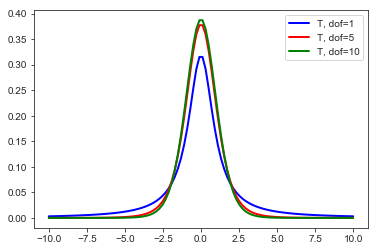

In [19]:
# Observe by changing the degrees of freedom in t
xmin = -10
xmax = 10
x = np.linspace(xmin,xmax,100)

from scipy.stats import t
dof = 1;
q = t.pdf(x,dof)
_ = plt.plot(x, q, 'b', linewidth = 2,label="T, dof=%d"%(dof))
_ = plt.legend()


dof = 5;
q = t.pdf(x,dof)
_ = plt.plot(x, q, 'r', linewidth = 2,label="T, dof=%d"%(dof))
_ = plt.legend()

dof = 10;
q = t.pdf(x,dof)
_ = plt.plot(x, q, 'g', linewidth = 2,label="T, dof=%d"%(dof))
_ = plt.legend()


plt.show()

### 11. Now, if you have time, try to implement what you have learnt in this session to the avacado dataset, we had extracted from zipfile.

1. What is the distribution of average price in the dataset.
2. Distribution of sampled price ?
3. CI for a case.

In [20]:
avacado.columns

Index([u'Unnamed: 0', u'Date', u'AveragePrice', u'Total Volume', u'4046',
       u'4225', u'4770', u'Total Bags', u'Small Bags', u'Large Bags',
       u'XLarge Bags', u'type', u'year', u'region'],
      dtype='object')

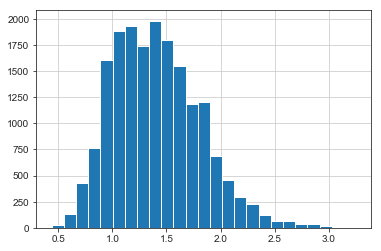

In [21]:
avacado['AveragePrice'].hist(bins = 25)
plt.show()

mean of random dataset, mu = 1.405978409775878


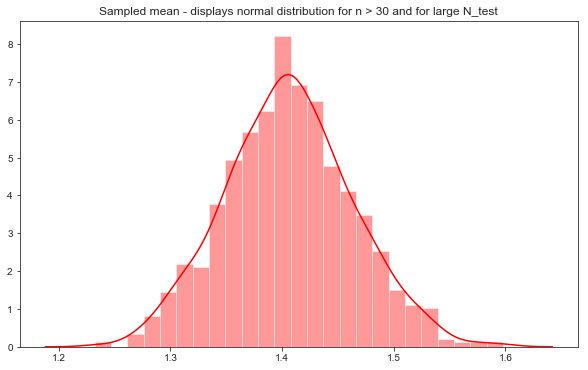

In [25]:
init_pop= avacado['AveragePrice']
mu = init_pop.mean() # True mean
print("mean of random dataset, mu = " + str(mu))

N_tests = 1000
n = 50
means = [0] * N_tests
   
    
for i in range(N_tests):
    observations = np.random.choice(init_pop.index.values,n)
    sampled_pop = init_pop.loc[observations]
    means[i] = sampled_pop.mean()    
    
''' While building histogramm, use either hist() or seaborn - distplot (upto you) to plot the means[i] array'''

sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.distplot(means, 25, color = 'red')
plt.title('Sampled mean - displays normal distribution for n > 30 and for large N_test')
plt.show()